**Demo for `teneva.func.demo`**

---

This module contains analytical functions (benchmarks) for testing and evaluating the effectiveness of algorithms.

## Loading and importing modules

In [1]:
import numpy as np
import teneva
from time import perf_counter as tpc
np.random.seed(42)

## Function `func_demo`

Build class instance for demo function by name.

In [2]:
func = teneva.func_demo(d=5, name='Ackley')
print(func.name)    # Name of the function
print(func.a)       # Grid lower bound
print(func.b)       # Grid upper bound
print(func.x_min)   # Argument for exact minimum
print(func.y_min)   # Value of exact minimum

Ackley
[-32.768 -32.768 -32.768 -32.768 -32.768]
[32.768 32.768 32.768 32.768 32.768]
[0. 0. 0. 0. 0.]
0.0


## Function `func_demo_all`

Build list of class instances for all demo functions.

In [3]:
funcs = teneva.func_demo_all(d=5, with_piston=True)
for func in funcs:
    print(func.name)

Ackley
Alpine
Dixon
Exponential
Grienwank
Michalewicz
Piston
Qing
Rastrigin
Rosenbrock
Schaffer
Schwefel


We can manually specify the list of names of the desired functions (a complete list of available benchmarks is given in the documentation for the "func_demo_all" function):

In [4]:
funcs = teneva.func_demo_all(d=4, names=['Ackley', 'rosenbrock', 'PISTON'])
for func in funcs:
    print(func.name)

Ackley
Piston
Rosenbrock


## Class `FuncDemoAckley`

Ackley function for demo and tests.

In [5]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoAckley(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[0.         3.62538494 6.59359908 9.02376728]
0.0 9.023767278119472


Minimum value:

In [6]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[0. 0. 0.]
0.0
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [7]:
func = teneva.FuncDemoAckley(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Ackley
y_min real = 0.0000000e+00; x_min real = [0. 0.]
y_min appr = 2.8506623e-02; x_min appr = [-0.00655491 -0.00655491]
y_max appr = 2.2320124e+01; x_max appr = [-32.50580356 -32.50580356]


We can plot the function for 2D case:

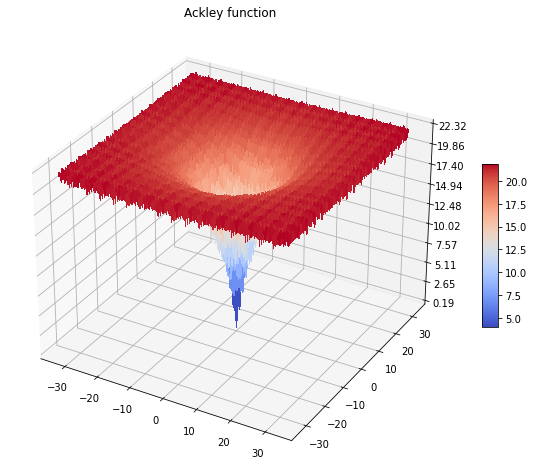

In [8]:
teneva.FuncDemoAckley(d=2).plot()

## Class `FuncDemoAlpine`

Alpine function for demo and tests.

In [9]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoAlpine(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[0.         2.82441295 6.05578456 2.17008007]
0.0 2.1700800725388047


Minimum value:

In [10]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[0. 0. 0.]
0.0
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [11]:
func = teneva.FuncDemoAlpine(d=2)
func.set_grid(n=10000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Alpine
y_min real = 0.0000000e+00; x_min real = [0. 0.]
y_min appr = 1.6937783e-04; x_min appr = [-0.1010101 -0.1010101]
y_max appr = 1.7430405e+01; x_max appr = [7.99179918 7.99179918]


We can plot the function for 2D case:

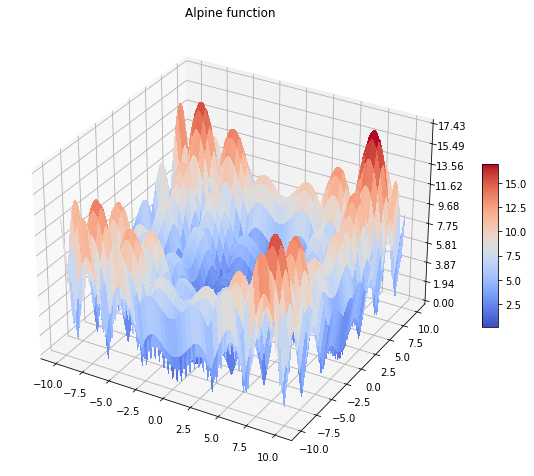

In [12]:
teneva.FuncDemoAlpine(d=2).plot()

## Class `FuncDemoDixon`

Dixon function for demo and tests.

In [13]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoDixon(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[1.000e+00 5.000e+00 1.810e+02 1.129e+03]
1.0 1129.0


Minimum value:

In [14]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[1.         0.70710678 0.59460356]
1.355854680848614e-31
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [15]:
func = teneva.FuncDemoDixon(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Dixon
y_min real = 0.0000000e+00; x_min real = [1.         0.70710678]
y_min appr = 4.9665293e-06; x_min appr = [ 0.99819964 -0.70614123]
y_max appr = 8.8321000e+04; x_max appr = [-10. -10.]


We can plot the function for 2D case:

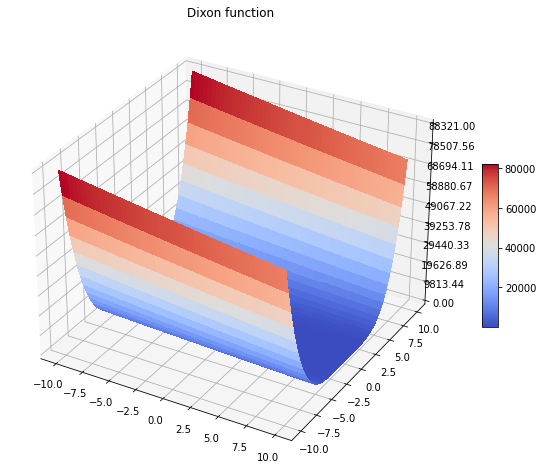

In [16]:
teneva.FuncDemoDixon(d=2).plot()

## Class `FuncDemoExponential`

Exponential function for demo and tests.

In [17]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoExponential(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[-1.00000000e+00 -2.23130160e-01 -2.47875218e-03 -1.37095909e-06]
-1.0 -1.3709590863840845e-06


Minimum value:

In [18]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[0. 0. 0.]
-1.0
-1.0


Let try to check the min-max values for 2D case by simple brute-force:

In [19]:
func = teneva.FuncDemoExponential(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Exponential
y_min real = -1.0000000e+00; x_min real = [0. 0.]
y_min appr = -9.9999996e-01; x_min appr = [-0.00020004 -0.00020004]
y_max appr = -3.6787944e-01; x_max appr = [-1. -1.]


We can plot the function for 2D case:

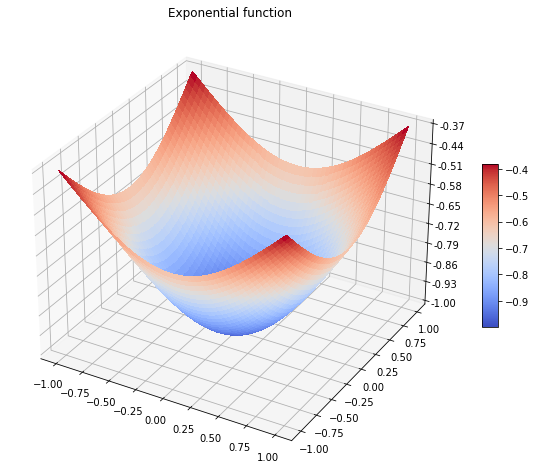

In [20]:
teneva.FuncDemoExponential(d=2).plot()

## Class `FuncDemoGrienwank`

Grienwank function for demo and tests.

In [21]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoGrienwank(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[0.         0.65656774 1.02923026 1.08990201]
0.0 1.0899020113755438


Minimum value:

In [22]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[0. 0. 0.]
0.0
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [23]:
func = teneva.FuncDemoGrienwank(d=2)
func.set_grid(n=7000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Grienwank
y_min real = 0.0000000e+00; x_min real = [0. 0.]
y_min appr = 5.5058961e-03; x_min appr = [-0.08572653 -0.08572653]
y_max appr = 1.8110645e+02; x_max appr = [ 597.25675096 -600.        ]


We can plot the function for 2D case:

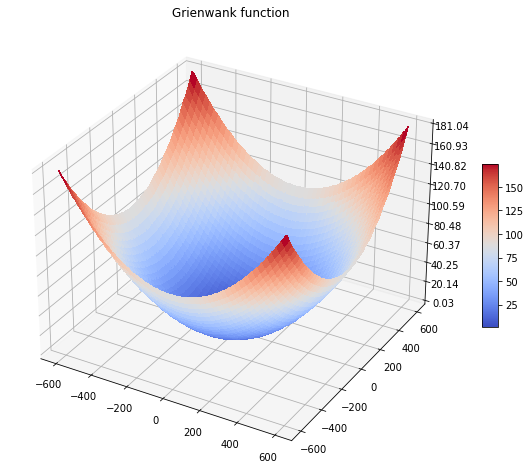

In [24]:
teneva.FuncDemoGrienwank(d=2).plot()

## Class `FuncDemoMichalewicz`

Michalewicz function for demo and tests.

In [25]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoMichalewicz(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[ 0.00000000e+00 -1.45382977e-02 -3.70232531e-01 -3.26333212e-04]
0.0 -0.000326333211876712


Minimum value:

In [26]:
func = teneva.FuncDemoMichalewicz(d=2)  # Is known only in 2-D case (x_min)
print(func.x_min)                       # Argument for exact minimum
print(func.get_f_poi(func.x_min))       # Computed minimum
print(func.y_min)                       # Value of exact minimum

[2.2  1.57]
-1.801140718473825
-1.8013


In [27]:
func = teneva.FuncDemoMichalewicz(d=2)  # Is known only in 2,5,10-D case (y_min)
print(func.y_min)                       # Value of exact minimum

func = teneva.FuncDemoMichalewicz(d=5)  # Is known only in 2,5,10-D case (y_min)
print(func.y_min)                       # Value of exact minimum

func = teneva.FuncDemoMichalewicz(d=10) # Is known only in 2,5,10-D case (y_min)
print(func.y_min)                       # Value of exact minimum

-1.8013
-4.687658
-9.66015


Let try to check the min-max values for 2D case by simple brute-force:

In [28]:
func = teneva.FuncDemoMichalewicz(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Michalewicz
y_min real = -1.8013000e+00; x_min real = [2.2  1.57]
y_min appr = -1.8012987e+00; x_min appr = [2.20269699 1.5704821 ]
y_max appr = 0.0000000e+00; x_max appr = [0. 0.]


We can plot the function for 2D case:

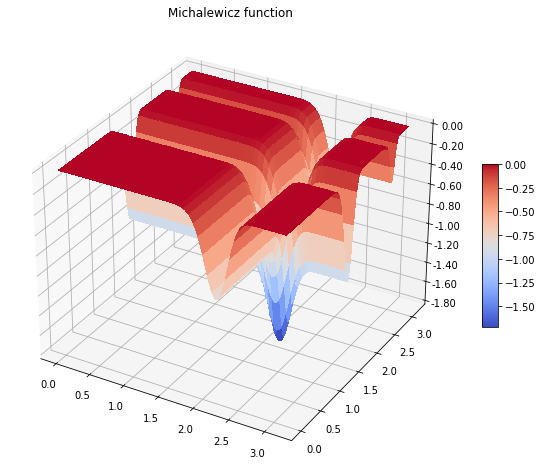

In [29]:
teneva.FuncDemoMichalewicz(d=2).plot()

## Class `FuncDemoPiston`

Piston function for demo and tests.

In [30]:
func = teneva.FuncDemoPiston()

X_spec = (func.a + func.b) / 2
X_spec = X_spec.reshape(1, -1)

print(func.get_f_poi(X_spec))
print(func.get_f_poi(X_spec[0]))

[0.46439702]
0.4643970224718025


## Class `FuncDemoQing`

Qing function for demo and tests.

In [31]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoQing(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[ 14.   5.  14. 149.]
14.0 149.0


Minimum value:

In [32]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[1.         1.41421356 1.73205081]
3.944304526105059e-31
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [33]:
func = teneva.FuncDemoQing(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Qing
y_min real = 0.0000000e+00; x_min real = [1.         1.41421356]
y_min appr = 1.5380363e-03; x_min appr = [1.00020004 1.40028006]
y_max appr = 1.2499850e+11; x_max appr = [500. 500.]


We can plot the function for 2D case:

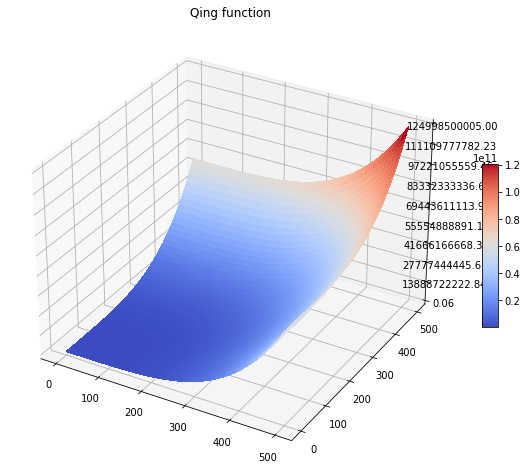

In [34]:
teneva.FuncDemoQing(d=2).plot()

## Class `FuncDemoRastrigin`

Rastrigin function for demo and tests.

In [35]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoRastrigin(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[ 0.  3. 12. 27.]
0.0 27.0


Minimum value:

In [36]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[0. 0. 0.]
0.0
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [37]:
func = teneva.FuncDemoRastrigin(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Rastrigin
y_min real = 0.0000000e+00; x_min real = [0. 0.]
y_min appr = 4.1622341e-04; x_min appr = [-0.0010242 -0.0010242]
y_max appr = 8.0706252e+01; x_max appr = [-4.52391278  4.52391278]


We can plot the function for 2D case:

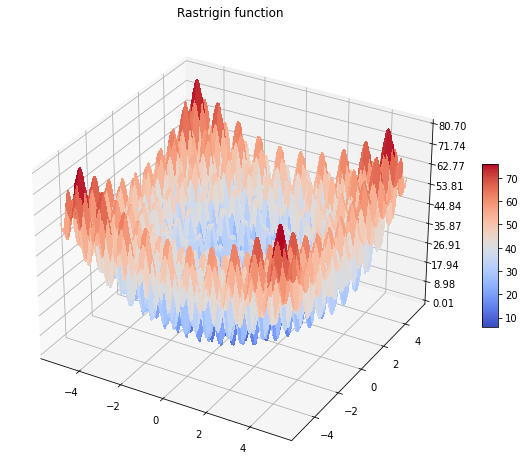

In [38]:
teneva.FuncDemoRastrigin(d=2).plot()

## Class `FuncDemoRosenbrock`

Rosenbrock function for demo and tests.

In [39]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoRosenbrock(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[2.000e+00 0.000e+00 8.020e+02 7.208e+03]
2.0 7208.0


Minimum value:

In [40]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[1. 1. 1.]
0.0
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [41]:
func = teneva.FuncDemoRosenbrock(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Rosenbrock
y_min real = 0.0000000e+00; x_min real = [1. 1.]
y_min appr = 1.1407817e-07; x_min appr = [1.00003361 1.00003361]
y_max appr = 3.9059262e+03; x_max appr = [-2.048 -2.048]


We can plot the function for 2D case:

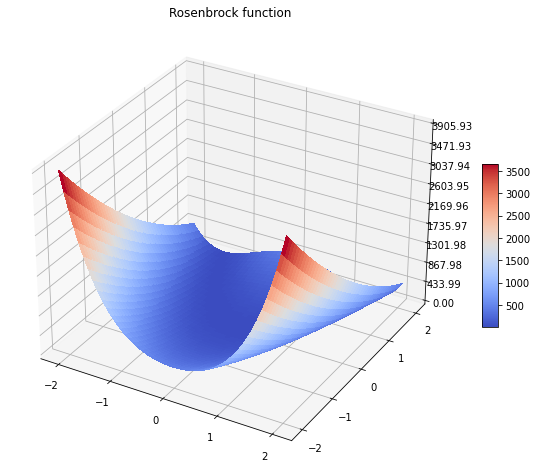

In [42]:
teneva.FuncDemoRosenbrock(d=2).plot()

## Class `FuncDemoSchaffer`

Schaffer function for demo and tests.

In [43]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoSchaffer(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[0.         1.94756906 0.20262542 1.56950769]
0.0 1.5695076886237076


Minimum value:

In [44]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[0. 0. 0.]
0.0
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [45]:
func = teneva.FuncDemoSchaffer(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Schaffer
y_min real = 0.0000000e+00; x_min real = [0. 0.]
y_min appr = 8.0090565e-04; x_min appr = [-0.020004 -0.020004]
y_max appr = 9.9754414e-01; x_max appr = [-1.54030806 -0.30006001]


We can plot the function for 2D case:

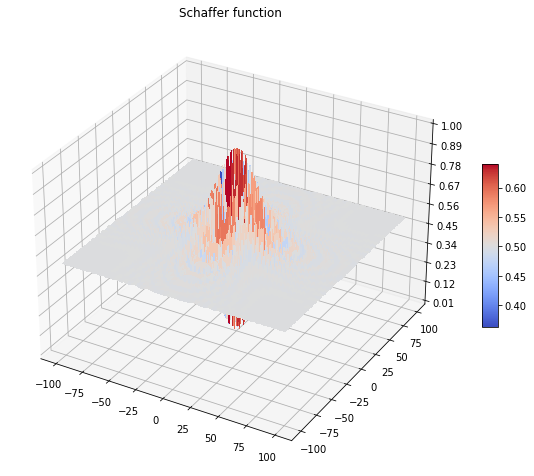

In [46]:
teneva.FuncDemoSchaffer(d=2).plot()

## Class `FuncDemoSchwefel`

Schwefel function for demo and tests.

In [47]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoSchwefel(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[1256.9487     1254.42428705 1251.02210432 1248.0654602 ]
1256.9487 1248.0654601950866


Minimum value:

In [48]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[420.9687 420.9687 420.9687]
3.818351251538843e-05
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [49]:
func = teneva.FuncDemoSchwefel(d=2)
func.set_grid(n=5000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Schwefel
y_min real = 0.0000000e+00; x_min real = [420.9687 420.9687]
y_min appr = 8.5699877e-05; x_min appr = [420.98419684 420.98419684]
y_max appr = 1.6759315e+03; x_max appr = [-420.98419684 -420.98419684]


We can plot the function for 2D case:

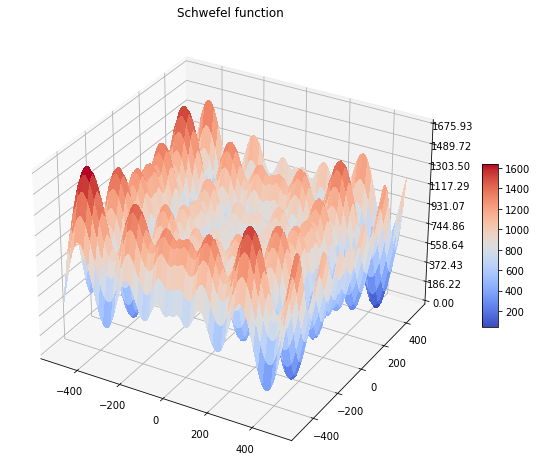

In [50]:
teneva.FuncDemoSchwefel(d=2).plot()

---